In [16]:
import pandas as pd
import numpy as np
import yfinance
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates

def getHistory(name, start, end, interval):
    ticker = yfinance.Ticker(name)
    df = ticker.history(interval= interval, start= start, end= end)
    df['MA5'] = df.Low.rolling(window = 5).mean()
    df['MA10'] = df.High.rolling(window= 10).mean()
    df['MA50'] = df.High.rolling(window= 50).mean()
    return df

In [17]:
name = 'TQQQ'
# name = 'BTC-USD'

start = "2021-06-16"
start = "2020-11-14"

end = None
interval = '1d'
df = getHistory(name, start, end, interval)

# df = df[-10:]
df['return-daily'] = df['Close'].pct_change() + 1
df['return-MA5'] = (df[ df['MA5'] < df['Close'] ]['return-daily']).cumprod(skipna = True)
df['return-Close'] = (df['Close'].pct_change() + 1).cumprod(skipna = True)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA5,MA10,MA50,return-daily,return-MA5,return-Close
Date,,,,,,,,,,,,,
2020-11-16,72.375000,74.504997,71.870003,74.239998,53437200,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-17,74.400002,74.680000,73.065002,73.555000,45676000,0,0.0,NaN,NaN,NaN,0.990773,NaN,0.990773
2020-11-18,73.129997,74.375000,71.849998,71.849998,38585400,0,0.0,NaN,NaN,NaN,0.976820,NaN,0.967807
2020-11-19,71.455002,73.845001,70.980003,73.629997,39835400,0,0.0,NaN,NaN,NaN,1.024774,NaN,0.991783
2020-11-20,73.525002,74.135002,72.059998,72.135002,32498400,0,0.0,71.965001,NaN,NaN,0.979696,0.979696,0.971646
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-15,166.910004,167.309998,162.089996,165.399994,34864600,0,0.0,160.562000,167.516000,146.169800,0.999698,11.057572,2.227909
2021-11-16,164.289993,169.410004,164.059998,168.820007,25795400,0,0.0,160.459998,168.520001,146.500400,1.020677,11.286212,2.273976
2021-11-17,169.210007,171.690002,167.789993,169.020004,28984000,0,0.0,162.717996,169.257001,146.897200,1.001185,11.299583,2.276670


In [18]:
1.003707 * 0.999588 * 0.978991 * 1.010066 * 1.009760 * 1.038881

1.0407355866820425

In [19]:
1.003707 * 0.999588 * 0.978991 * 1.010066 * 1.009760 * 1.038881 * 0.956179 * 1.008110

1.0032000128847323

<AxesSubplot:xlabel='Date'>

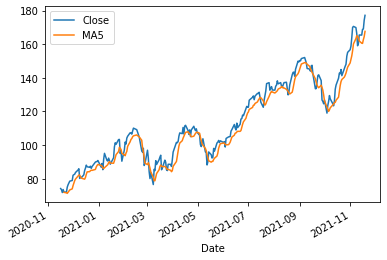

In [20]:
df[['Close', 'MA5']].plot()

In [23]:

df['MA5-test'] = (df[ df['MA5'] < df['Close'] ]['Close'].pct_change() + 1).cumprod()

In [24]:
df['MA5-test'][-1] / df['MA5-test'][-10]

0.9941152236620882

In [20]:
df['Close'][-1] / df['Close'][-10]

0.9945860165444682

In [4]:
# df[['Close', 'MA5', 'MA10']].plot()
# df[['Close', 'MA5', 'MA5-Close']].plot(figsize=(40,20))

In [57]:
s = pd.Series([2, np.nan, 4, -3, 1])
s

0    2.0
1    NaN
2    4.0
3   -3.0
4    1.0
dtype: float64

In [58]:
s.cumprod(skipna = True)


0     2.0
1     NaN
2     8.0
3   -24.0
4   -24.0
dtype: float64